In [2]:
import pandas as pd
import os

In [29]:
os.chdir(r'C:\\Users\\User\\LearningSpoons\\파이썬 머신러닝\\3-3 실습 파일\\data')  
iris = pd.read_csv('IRIS.csv')

In [4]:
pwd

'C:\\Users\\User\\LearningSpoons\\파이썬 머신러닝\\3-3 실습 파일\\data'

In [5]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [6]:
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [34]:
iris['id'] = range(len(iris))   #하나하나의 값을 고유하게 구분하기 위해 id값 생성
iris = iris[['id','sepal_length','sepal_width','petal_length','petal_width','species']]
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


# KNN 실습 (분류, 범주형변수 예측할때)
**특징**   
: 데이터가 많으면 느림
    
**파라미터**  
1. n_neighbors : 가장 가까운 몇 개를 볼건지


In [35]:
train = iris.sample(100, replace=False, random_state=2020) # 비복원 추출, 씨드지정
train = train.reset_index().drop(['index'], axis=1)

In [36]:
test = iris.loc[~iris['id'].isin(train['id'])]   # ~ 쓰면 반대, 즉 train에 없는 id 쓰겠다는 뜻
test = test.reset_index().drop(['index'], axis=1)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# 모델 생성 (객체 생성)
knn = KNeighborsClassifier(n_neighbors = 3)

# 모델 학습  knn.fit(input, output)
knn.fit(train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'])

# 모델 예측
predictions = knn.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

In [12]:
test['pred'] = predictions
test.head(5)

,id,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
1,3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
2,6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
3,9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
4,20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa


In [13]:
# 예측이 맞는 비율
(test['species'] == test['pred']).mean()

0.98

### 최적의 k 찾기 (1)

In [14]:
for k in range(1,30) :

    # 모델 생성 (객체 생성)
    knn = KNeighborsClassifier(n_neighbors = k)

    # 모델 학습  knn.fit(input, output)
    knn.fit(train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'])

    # 모델 예측
    predictions = knn.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

    test['pred'] = predictions

    # 예측이 맞는 비율
    print((test['species'] == test['pred']).mean())

0.94
0.94
0.98
0.98
0.98
0.96
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.98
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96


**k가 3일때 가장 최적임!!**

### **최적의 k찾기 (2)** (cross validation)

In [63]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [70]:
knn = KNeighborsClassifier( n_neighbors=3 )

np.mean(cross_val_score(knn, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], cv=3))  # cv는 몇번 분기할지 지정해줌
# 정확도들의 평균 : 97.4%

0.9733333333333333

In [72]:
for k in range(1,30) :
    knn = KNeighborsClassifier( n_neighbors=k )
    print(np.mean(cross_val_score(knn, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], cv=3)))
    
# CV가 올라가면 신뢰성은 올라가지만 특정값보다 너무 크면 안돌아감, 계산시간이 오래걸림

0.96
0.9466666666666667
0.9733333333333333
0.9866666666666667
0.98
0.9733333333333333
0.9733333333333333
0.9666666666666667
0.9733333333333333
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.96
0.9533333333333333
0.9533333333333333
0.96
0.96
0.9533333333333333
0.9533333333333333
0.9466666666666667
0.9533333333333333
0.9466666666666667
0.94
0.9333333333333332
0.94
0.9533333333333333
0.9533333333333333
0.9533333333333333
0.9533333333333333


최적의 k는 4 이다

# KNN 실습 (회귀, 연속형변수 예측할때)

In [15]:
del train['species']
del test['species']

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [67]:
# 모델 생성 (객체 생성)
knn = KNeighborsRegressor(n_neighbors = 3)

# 모델 학습  knn.fit(input, output)
knn.fit( train[['sepal_length','sepal_width','petal_length']], train['petal_width'])

# 모델 예측
knn.predict(test[['sepal_length','sepal_width','petal_length']])

array([0.16666667, 0.2       , 0.2       , 0.13333333, 0.36666667,
       0.23333333, 0.23333333, 0.2       , 0.3       , 0.16666667,
       0.16666667, 0.23333333, 1.53333333, 1.33333333, 1.26666667,
       1.7       , 1.4       , 1.33333333, 1.26666667, 1.43333333,
       1.2       , 1.33333333, 1.7       , 1.16666667, 1.2       ,
       1.26666667, 1.86666667, 1.3       , 1.53333333, 1.26666667,
       1.        , 2.33333333, 2.16666667, 2.        , 2.        ,
       2.13333333, 1.86666667, 2.        , 2.36666667, 2.36666667,
       1.8       , 2.16666667, 2.26666667, 1.9       , 2.        ,
       2.13333333, 1.8       , 2.36666667, 2.2       , 1.8       ])

In [56]:
test['pred'] = knn.predict(test[['sepal_length','sepal_width','petal_length']])
test.head(5)

,id,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,1,4.9,3.0,1.4,0.2,Iris-setosa,0.166667
1,3,4.6,3.1,1.5,0.2,Iris-setosa,0.200000
2,6,4.6,3.4,1.4,0.3,Iris-setosa,0.200000
3,9,4.9,3.1,1.5,0.1,Iris-setosa,0.133333
4,20,5.4,3.4,1.7,0.2,Iris-setosa,0.366667


### **MAE**  
회귀문제에서 모델의 성능을 평가하는 방법  

sigma |실제값-예측값| / n      
(n : 실제값의 개수)

즉, (실제값-예측값)의 평균  
mae가 작을 수록 예측을 잘한것


In [57]:
# mae 구하기
abs(test['petal_width'] - test['pred']).mean()

0.1673333333333333

### 최적의 k 찾기

In [76]:
for k in range(1,30) :
    
    # 모델 생성 (객체 생성)
    knn = KNeighborsRegressor(n_neighbors = k)

    # 모델 학습  knn.fit(input, output)
    knn.fit( train[['sepal_length','sepal_width','petal_length']], train['petal_width'])

    # 모델 예측
    knn.predict(test[['sepal_length','sepal_width','petal_length']])

    test['pred'] = knn.predict(test[['sepal_length','sepal_width','petal_length']])

    # mae 구하기
    print(abs(test['petal_width'] - test['pred']).mean())

0.196
0.16699999999999995
0.1673333333333333
0.1655
0.16839999999999994
0.1619999999999999
0.16342857142857137
0.16125
0.16155555555555556
0.16260000000000002
0.16254545454545455
0.1635
0.1636923076923077
0.1695714285714286
0.1738666666666667
0.17587499999999995
0.18282352941176455
0.18955555555555553
0.1913684210526316
0.19329999999999994
0.19780952380952382
0.20045454545454547
0.20330434782608697
0.2045
0.2084800000000001
0.2123076923076923
0.21599999999999997
0.21878571428571422
0.22365517241379315


**k가 8일때 예측을 가장 잘함!!**

# 의사결정나무 실습

**특징**  
1. 해석이 쉽다
2. 빠르다.


**파리미터**  
1. min_samples_split : 의사결정나무에서 각 구간의 최소 샘플 수, 이보다 작으면 더이상 분리되지 않음

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 10)

In [38]:
dt.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species'])

DecisionTreeClassifier(min_samples_split=10)

In [40]:
pred = dt.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [42]:
test['pred'] = pred

In [43]:
(test['pred'] == test['species']).mean()  # 예측 정확도 96%

0.96

**모델 시각화하고 해석해보기**

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

<function matplotlib.pyplot.show(close=None, block=None)>

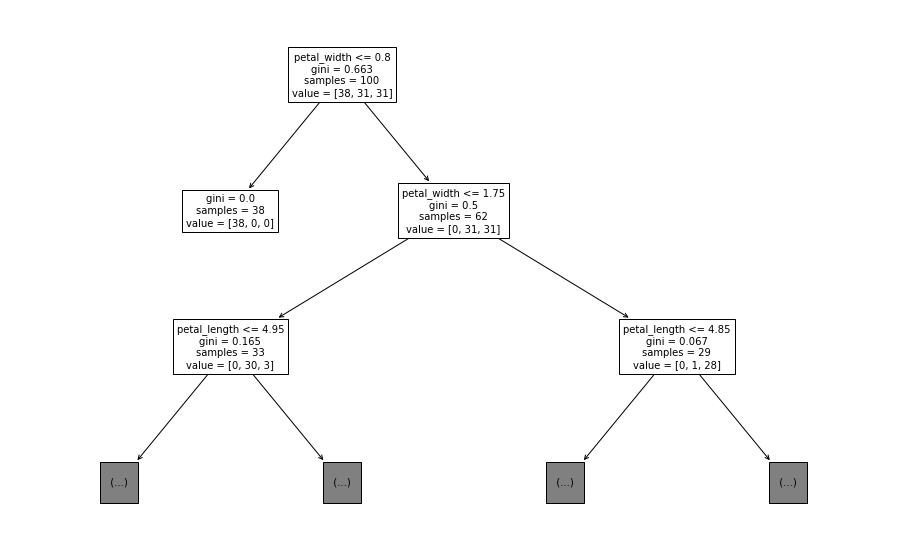

In [44]:
rcParams['figure.figsize'] = 16,10  # plot크기 키우기
a = tree.plot_tree(dt, feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], fontsize=10, max_depth=2)  # 최대깊이 2
plt.show

# Cross Validaion 실습

In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [46]:
dt = DecisionTreeClassifier(min_samples_split=10)

In [47]:
cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], cv=3)  # cv는 몇번 분기할지 지정해줌
# 데이터 3등분뒤에 각각의 정확도가 나옴

array([0.98, 0.94, 0.98])

In [51]:
n.mean(cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], cv=3))  # cv는 몇번 분기할지 지정해줌
# 정확도들의 평균 : 96.7%

0.9666666666666667